In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [6]:
df = pd.read_csv("AIML Dataset.csv")

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83561 entries, 0 to 83560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            83561 non-null  int64  
 1   type            83561 non-null  object 
 2   amount          83561 non-null  float64
 3   nameOrig        83561 non-null  object 
 4   oldbalanceOrg   83560 non-null  float64
 5   newbalanceOrig  83560 non-null  float64
 6   nameDest        83560 non-null  object 
 7   oldbalanceDest  83560 non-null  float64
 8   newbalanceDest  83560 non-null  float64
 9   isFraud         83560 non-null  float64
 10  isFlaggedFraud  83560 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 7.0+ MB


In [9]:
df["isFraud"].value_counts()

,count
isFraud,
0.0,83448
1.0,112


In [10]:
df["isFlaggedFraud"].value_counts()

,count
isFlaggedFraud,
0.0,83560


In [11]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [12]:
df.dropna(inplace= True)
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [13]:
df.shape

(83560, 11)

In [14]:
round((df["isFraud"].value_counts()[1] / df.shape[0]) * 100, 2)

np.float64(0.13)

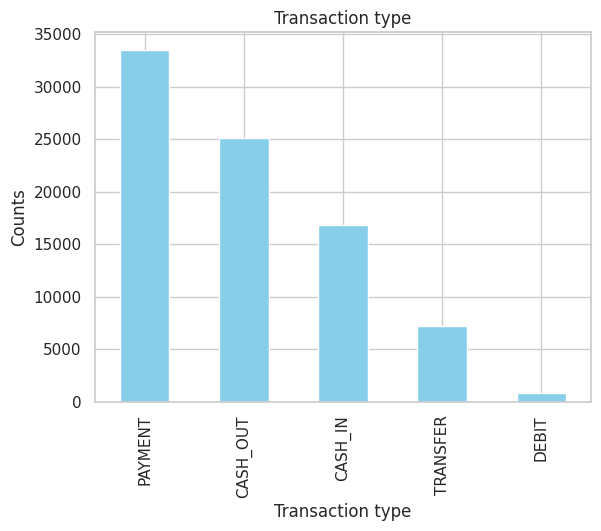

In [15]:
df["type"].value_counts().plot(kind='bar', title='Transaction type', color='skyblue')
plt.xlabel('Transaction type')
plt.ylabel('Counts')
plt.show()

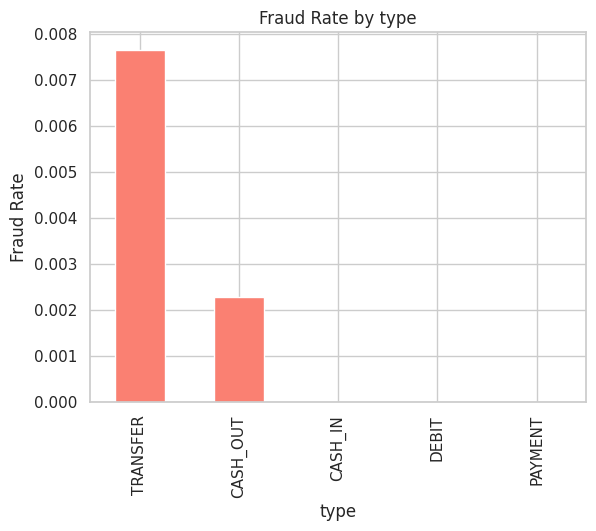

In [16]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar', title="Fraud Rate by type", color="salmon")
plt.ylabel("Fraud Rate")
plt.show()

In [17]:
df["amount"].describe().astype(int)

,amount
count,83560
mean,168488
std,336358
min,0
25%,9550
50%,48733
75%,205677
max,10000000


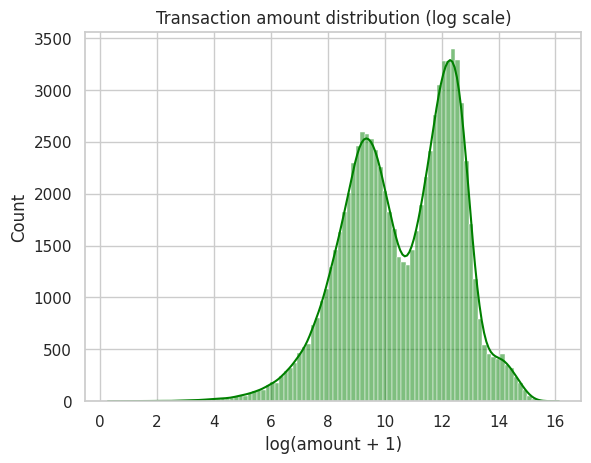

In [18]:
sns.histplot(np.log1p(df["amount"]), bins=100, kde = True, color = "green")
plt.title("Transaction amount distribution (log scale)")
plt.xlabel("log(amount + 1)")
plt.show()

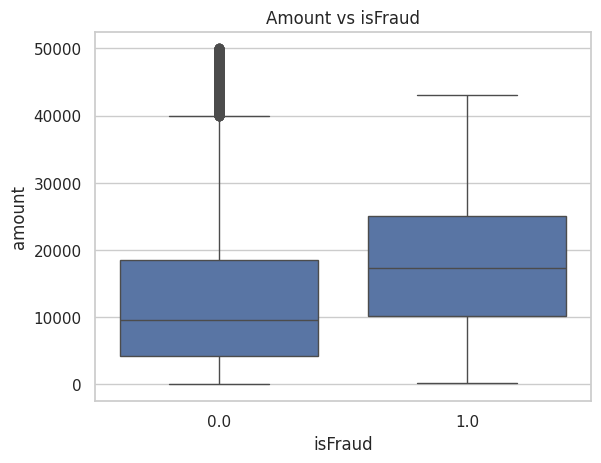

In [19]:
sns.boxplot(data = df[df["amount"] < 50000], x="isFraud", y="amount")
plt.title("Amount vs isFraud")
plt.show()

In [20]:
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df['oldbalanceDest'] - df['newbalanceDest']

In [21]:
(df['balanceDiffOrig']<0).sum()

np.int64(16793)

In [22]:
(df['balanceDiffDest'] < 0).sum()

np.int64(33042)

In [23]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,181.00,21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,11668.14,0.0


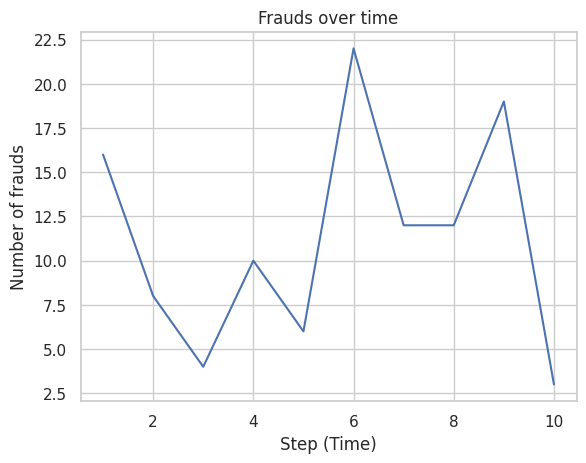

In [24]:
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label="Fraud per step")
plt.xlabel("Step (Time)")
plt.ylabel("Number of frauds")
plt.title("Frauds over time")
plt.grid(True)
plt.show()

In [25]:
df.drop(columns = "step", inplace= True)

In [26]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,11668.14,0.0


In [27]:
top_senders = df["nameOrig"].value_counts().head(10)
top_senders

,count
nameOrig,
C722886752,1
C1231006815,1
C1666544295,1
C1305486145,1
C840083671,1
C2048537720,1
C90045638,1
C154988899,1
C941682687,1


In [28]:
top_receivers = df["nameDest"].value_counts().head(10)
top_receivers

,count
nameDest,
C985934102,78
C248609774,69
C1286084959,69
C1590550415,67
C2083562754,65
C665576141,64
C977993101,63
C1360767589,62
C451111351,59


In [29]:

fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)
fraud_users

,count
nameOrig,
C1305486145,1
C840083671,1
C1420196421,1
C2101527076,1
C137533655,1
C1118430673,1
C749981943,1
C1334405552,1
C467632528,1


In [30]:
fraud_types = df[df["type"].isin(["TRANSFER", "CASH_OUT"])]
fraud_types["type"].value_counts()

,count
type,
CASH_OUT,25155
TRANSFER,7192


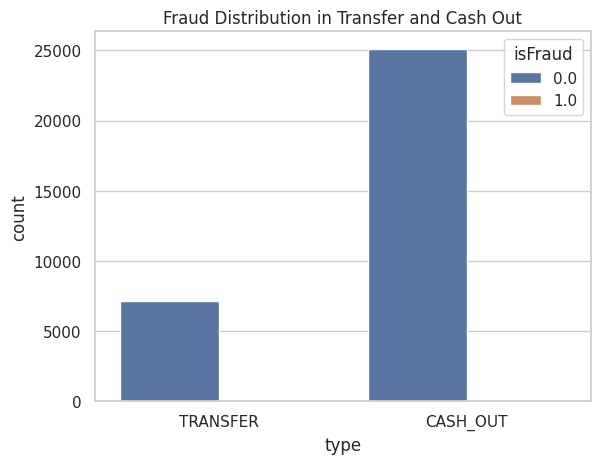

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'balanceDiffOrig', 'balanceDiffDest'],
      dtype='object')

In [31]:
sns.countplot(data= fraud_types, x="type", hue="isFraud")
plt.title("Fraud Distribution in Transfer and Cash Out")
plt.show()
df.columns

In [32]:
corr = df[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]].corr()

In [33]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.005449,-0.011740,0.255485,0.378980,0.041582
oldbalanceOrg,-0.005449,1.000000,0.998923,0.107843,0.075448,-0.004387
newbalanceOrig,-0.011740,0.998923,1.000000,0.109723,0.074773,-0.011580
oldbalanceDest,0.255485,0.107843,0.109723,1.000000,0.934949,-0.010200
newbalanceDest,0.378980,0.075448,0.074773,0.934949,1.000000,-0.007017
isFraud,0.041582,-0.004387,-0.011580,-0.010200,-0.007017,1.000000


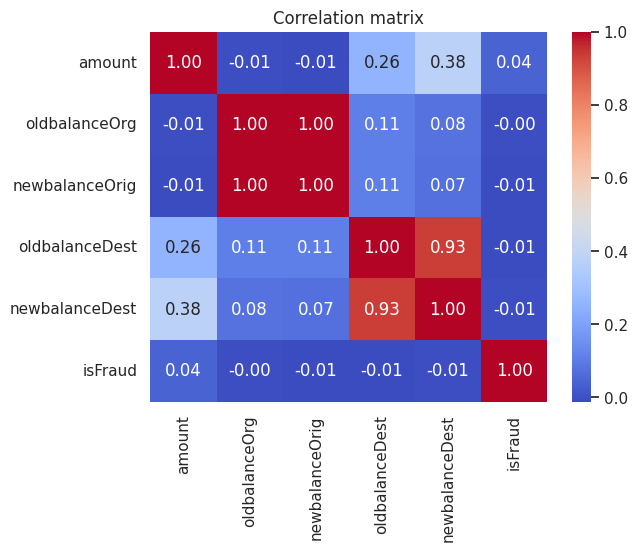

In [34]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix")
plt.show()

In [35]:
zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0) &
    (df["newbalanceOrig"] == 0) &
    (df["type"].isin(["TRANSFER","CASH_OUT"]))
]

zero_after_transfer

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1.0,0.0,181.00,0.00
3,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1.0,0.0,181.00,21182.00
15,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0.0,0.0,15325.00,-46430.44
19,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0.0,0.0,705.00,22425.00
24,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0.0,0.0,10835.00,-2712905.89
...,...,...,...,...,...,...,...,...,...,...,...,...
83545,TRANSFER,1357386.78,C1217956846,5241.23,0.0,C246785519,0.00,1357386.78,0.0,0.0,5241.23,-1357386.78
83547,CASH_OUT,462929.84,C363257775,201000.00,0.0,C327286561,0.00,462929.84,0.0,0.0,201000.00,-462929.84
83552,CASH_OUT,425512.33,C1153742407,483.00,0.0,C1024208640,501371.85,575092.56,0.0,0.0,483.00,-73720.71
83557,CASH_OUT,319045.01,C1964329082,56471.00,0.0,C699133054,0.00,319045.01,0.0,0.0,56471.00,-319045.01


In [36]:
df["isFraud"].value_counts()

,count
isFraud,
0.0,83448
1.0,112


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [38]:
df_model = df.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)

In [39]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0,181.00,21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0,11668.14,0.0


In [40]:
categorical = ["type"]
numeric = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [41]:
y = df_model["isFraud"]
X = df_model.drop("isFraud", axis = 1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [44]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop="first"), categorical)
    ],
    remainder="drop"
)

In [45]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
])

pipeline.fit(X_train, y_train)



Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [46]:
y_pred = pipeline.predict(X_test)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91     25034
         1.0       0.01      0.97      0.02        34

    accuracy                           0.83     25068
   macro avg       0.50      0.90      0.46     25068
weighted avg       1.00      0.83      0.91     25068



In [48]:
confusion_matrix(y_test, y_pred)

array([[20767,  4267],
       [    1,    33]])

In [49]:
pipeline.score(X_test, y_test)

0.829743098771342